In [ ]:
import numpy as np

In [ ]:
class Perceptron(object):
  def __init__(self,eta = 0.001,n_iter=50,random_state = 1):
    self.eta  = eta
    self.n_iter = n_iter
    self.random_state = 1

  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi , target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self,X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)


In [ ]:
import os
import pandas as pd

In [ ]:
s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(s, header = None)

In [ ]:
df.iloc[50]

0                7.0
1                3.2
2                4.7
3                1.4
4    Iris-versicolor
Name: 50, dtype: object

In [ ]:
y = df.iloc[0:100,4].values

In [ ]:
y = np.where(y == 'Iris-setosa',-1,1)


In [ ]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
X = df.iloc[0:100,[0,2]].values

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

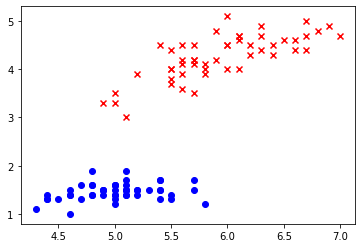

In [ ]:
plt.scatter(X[:50,0],X[:50,1],color ='blue',marker = 'o', label = 'setosa' )
plt.scatter(X[50:,0],X[50:,1],color ='red',marker = 'x', label = 'versicolor' )
plt.show()

In [ ]:
ppn = Perceptron(eta  = 0.1, n_iter = 10)

In [ ]:
ppn.fit(X,y)

In [ ]:
X_test = pd.DataFrame(columns=['0',	'1'],data= {'col1': [5, 2], 'col2': [4.5, 4]})
# plt.plot(range(0,len(ppn.errors_),ppn.errors_,marker  = 'o')

In [ ]:
test = ppn.predict(X_test)

In [ ]:
print(test)

[]


In [ ]:
import pandas as pd
import numpy as np
import os 
s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(s, header = None)

In [ ]:
X_train = df.iloc[:,[0,2]]
X_train

,0,2
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [ ]:
y_train = pd.DataFrame({"class" : df.iloc[:,4].tolist()})
kind_dict = {'Iris-setosa' : 1,'Iris-versicolor' :0, 'Iris-virginica' : -1}
y_train = y_train['class'].map(kind_dict)

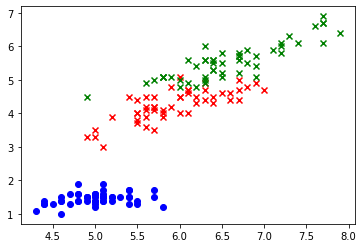

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for_picture = X_train.values

plt.scatter(for_picture[:50,0],for_picture[:50,1],color ='blue',marker = 'o', label = 'setosa' )
plt.scatter(for_picture[50:100,0],for_picture[50:100,1],color ='red',marker = 'x', label = 'versicolor' )
plt.scatter(for_picture[100:,0],for_picture[100:,1],color ='green',marker = 'x', label = 'virginica' )
plt.show()

In [ ]:
from pandas.compat.numpy.function import REPEAT_DEFAULTS
class Perceptron2(object):
  def __init__(self,eta = 0.001,n_iter=50,random_state = 1):
    self.eta  = eta
    self.n_iter = n_iter
    self.random_state = 1

  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.errors_ = [] 

    for _ in range(self.n_iter):
      errors = 0
      for xi , target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self,X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)
  def predict_last(self,X):
    return X[:,0] + X[:,1]



In [ ]:
setozaVersicolor = Perceptron2(eta = 0.01, n_iter = 100)
versicolorVirginica = Perceptron2(eta = 0.01, n_iter = 100)

In [ ]:
np.where(y_train.iloc[0:100].values == 0, -1,1)
np.where(y_train.iloc[50:150].values == 0, -1,1)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
setozaVersicolor.fit(X_train.iloc[0:100].values,np.where(y_train.iloc[0:100].values == 0, 1,-1))
versicolorVirginica.fit(X_train.iloc[50:150].values,np.where(y_train.iloc[50:150].values == 0, -1,1))

In [ ]:
predictSetozaVersicolor = setozaVersicolor.predict(X_train.iloc[0:150].values)
predictVersicolorVirginica = versicolorVirginica.predict(X_train.iloc[0:150].values)

In [ ]:
X_last = pd.DataFrame([predictSetozaVersicolor,predictVersicolorVirginica]).transpose().values

In [ ]:
X_train = df.iloc[:,[0,2]]

y_train = pd.DataFrame({"class" : df.iloc[:,4].tolist()})
kind_dict = {'Iris-setosa' : 1,'Iris-versicolor' :0, 'Iris-virginica' : -1}
y_train = y_train['class'].map(kind_dict)

In [ ]:
# setozaVersicolor.fit(X_train.iloc[0:100].values,np.where(y_train.iloc[0:100].values == 0, -1,1))
# versicolorVirginica.fit(X_train.iloc[50:150].values,np.where(y_train.iloc[50:150].values == 0, -1,1))

In [ ]:
setozaVersicolor.predict(X_train.iloc[0:150].values)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:

versicolorVirginica.predict(X_train.iloc[0:150].values)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
X_last

array([[-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1

In [ ]:
arr = []
